In [35]:
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sts
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

Populating the interactive namespace from numpy and matplotlib


Pareto: f(x, b) = b / x ** (b+1) for x >= 1, b > 0

In [83]:
k = 4.0
xm = 3.0

#frozen distribution
distributionRv = sts.pareto(k, loc=0, scale=xm)

distributionSample = distributionRv.rvs(1000)
s = 'Theoretical mean: {}\nTheoretical standard deviation: {}'
print s.format(distributionRv.mean(), distributionRv.std())

Theoretical mean: 4.0
Theoretical standard deviation: 1.41421356237


Text(0,0.5,'pdf')

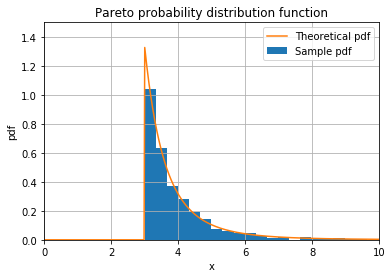

In [80]:
plt.hist(distributionSample, bins=30, normed=True, label='Sample pdf')
x = np.linspace(0,20,1000)
pdf = distributionRv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.5])
plt.title('Pareto probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

Математическое ожидание: 
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04


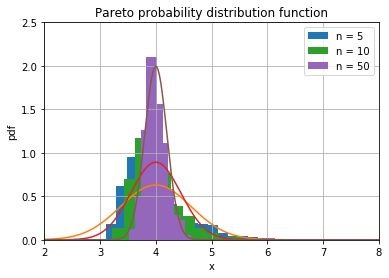

In [84]:
sampleNum = 1000
sampleVolume = [5, 10, 50]
distributionSamples = np.zeros( (len(sampleVolume), sampleNum) )
for i in xrange( len(sampleVolume) ):
    for j in xrange(sampleNum):
        distributionSampleTemp = np.array( sts.pareto.rvs(k, loc=0, scale=xm, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean

distributionSampleMean = k * xm / (k - 1)
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in xrange( len(sampleVolume) ):
    distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / sampleVolume[i]
    
print 'Математическое ожидание: '.format(distributionSampleMean)
for i in xrange( len(sampleVolume) ):
    print 'Дисперсия для n = {}: {}'.format(sampleVolume[i], distributionSampleVariance[i])

for i in xrange( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы. С ростом n точность нормальной аппроксимации увеличивается.